## Implementation of Naive Bayes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn


In [2]:
dataset=pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
dataset.shape

(400, 5)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
x=dataset.iloc[:,[1,2,3]].values
y=dataset.iloc[:,-1].values

In [7]:
x

array([['Male', 19, 19000],
       ['Male', 35, 20000],
       ['Female', 26, 43000],
       ...,
       ['Female', 50, 20000],
       ['Male', 36, 33000],
       ['Female', 49, 36000]], dtype=object)

#### since our dataset contains character variables, we have to encode it using LabelEncoder

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x[:,0]=le.fit_transform(x[:,0])

In [9]:
x

array([[1, 19, 19000],
       [1, 35, 20000],
       [0, 26, 43000],
       ...,
       [0, 50, 20000],
       [1, 36, 33000],
       [0, 49, 36000]], dtype=object)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

### Feature scaling
#### next,we are doing feature scaling to the training and test set of independent variavles 

In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train) 
x_test=sc.transform(x_test)

### Distribution

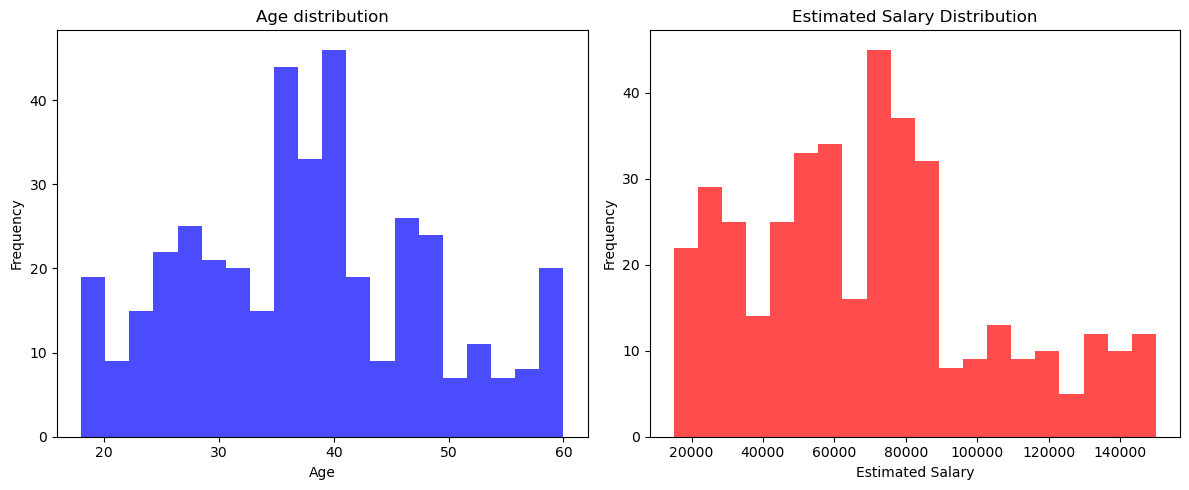

In [12]:
age_data=dataset['Age']
salary_data=dataset['EstimatedSalary']

plt.figure(figsize=(12,5))
# plot age distributon
plt.subplot(1,2,1)
plt.hist(age_data,bins=20,color='blue',alpha=0.7)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
# plot estimated salary distributon

plt.subplot(1,2,2)
plt.hist(salary_data,bins=20,color='red',alpha=0.7)
plt.title('Estimated Salary Distribution')
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')
#adjust layout
plt.tight_layout()
plt.show()

### Training the naive bayes model

In [13]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [14]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,y_pred)
ac=accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        58
           1       0.90      0.82      0.86        22

    accuracy                           0.93        80
   macro avg       0.92      0.89      0.90        80
weighted avg       0.92      0.93      0.92        80



In [15]:
from sklearn.naive_bayes import BernoulliNB
classifier=BernoulliNB()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [16]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,y_pred)
ac=accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        58
           1       0.72      0.59      0.65        22

    accuracy                           0.82        80
   macro avg       0.79      0.75      0.77        80
weighted avg       0.82      0.82      0.82        80



In [18]:
import joblib
joblib.dump(classifier,'social network.joblib')

['social network.joblib']